#**Tech Challenge - Ibovespa**


## Tarefa

Realizar um modelo preditivo com dados da IBOVESPA para criar uma série temporal e prever diariamente o fechamento da base. Demonstrar para o time de investimentos:
1. O modelo com o storytelling, desde a captura do dado até a entrega do modelo;
2. Justificar a técnica utilizada;
3. Atingir uma acuracidade adequada (acima de 70%).

## Contexto

**O que é o IBOVESPA?**

O Ibovespa é o principal índice da Bolsa de Valores de São Paulo (B3). Ele funciona como um termômetro do mercado acionário do Brasil e mede, através de um sistema de pontos baseado em reais, o desempenho médio de uma carteira teórica com as ações mais representativas e negociadas em Bolsa. Essa carteira teórica é reavaliada a cada 4 meses pela B3. Os principais critérios para que uma empresa faça parte do índice é ter uma boa liquidez e grande volume financeiro negociado em Bolsa.

Algumas das empresas que compõem o Ibovespa em set/2023 são: Bradesco, Alpargatas, Ambev, Arezzo, Assai, Carrefour, Cielo, entre outras. Podemos perceber que as empresas atuam em mercados distintos, e qualquer alteração nesses mercados pode alterar as ações da empresa e, consequentemente, o índice.  

Além disso, o peso de cada uma das ações na pontuação do índice Ibovespa pode diferir e variar, conforme o volume de ativos de uma mesma empresa presente na composição da carteira. Ou seja, se o índice subir, não significa que, necessariamente, todas as ações que compõem a carteira tiveram alta, já que alguns ativos possuem maior peso do que outros e ajudam a puxar o índice para cima ou para baixo.

A previsão do IBOVESPA é relevante para entendermos melhor o comportamento do mercado de ações e tomarmos decisões mais assertivas no investimento de nossos ativos.


Fonte: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm (Acesso em 04/09/2023)

**Janela temporal**

Optamos por analisar dados do último ano (**30/08/2022 a 30/08/2023**), para verificar oscilações e padrões anuais da base. Caso usássemos dados dos últimos 2 ou 3 anos, teríamos o comportamento da pandemia como início da base, e esses dados provavelmente não mostrariam o comportamento padrão do mercado, por isso optamos por uma janela de análise mais curta. É importante também considerar que a variação inflacionária dos últimos anos e as eleições presidenciais de 2022 podem ter influência nas variações do índice.

## Análise Descritiva

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_1a = pd.read_csv('Ibovespa_1a.csv')
df_1a

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,29.08.2023,118.404,118.051,118.493,117.400,"9,63M","1,10%"
1,28.08.2023,117.121,115.838,117.253,115.836,"9,60M","1,11%"
2,25.08.2023,115.837,117.025,117.252,115.397,"9,21M","-1,02%"
3,24.08.2023,117.026,118.135,118.136,116.848,"9,20M","-0,94%"
4,23.08.2023,118.135,116.160,118.135,116.159,"11,54M","1,70%"
...,...,...,...,...,...,...,...
245,05.09.2022,112.203,110.868,112.671,110.865,"9,52M","1,21%"
246,02.09.2022,110.864,110.409,112.264,110.409,"16,69M","0,42%"
247,01.09.2022,110.405,109.524,110.405,108.217,"14,48M","0,81%"
248,31.08.2022,109.523,110.431,111.364,109.523,"14,79M","-0,82%"


In [ ]:
df_1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      250 non-null    object 
 1   Último    250 non-null    float64
 2   Abertura  250 non-null    float64
 3   Máxima    250 non-null    float64
 4   Mínima    250 non-null    float64
 5   Vol.      250 non-null    object 
 6   Var%      250 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.8+ KB


In [ ]:
print("Quantidade de dados nulos: ", df_1a.isna().sum().sum())

Quantidade de dados nulos:  0


In [ ]:
print("Quantidade de linhas e colunas: ", df_1a.shape)

Quantidade de linhas e colunas:  (250, 7)


In [ ]:
df_1a['Data'] = pd.to_datetime(df_1a.Data, format = "%d.%m.%Y")

In [ ]:
df_1a.drop(["Abertura", "Mínima", "Máxima", "Vol.", "Var%"], inplace=True, axis=1)

In [ ]:
df_1a

,Data,Último
0,2023-08-29,118.404
1,2023-08-28,117.121
2,2023-08-25,115.837
3,2023-08-24,117.026
4,2023-08-23,118.135
...,...,...
245,2022-09-05,112.203
246,2022-09-02,110.864
247,2022-09-01,110.405
248,2022-08-31,109.523


In [ ]:
df_1a_1 = df_1a.set_index('Data')

In [ ]:
df_1a_1

,Último
Data,
2023-08-29,118.404
2023-08-28,117.121
2023-08-25,115.837
2023-08-24,117.026
2023-08-23,118.135
...,...
2022-09-05,112.203
2022-09-02,110.864
2022-09-01,110.405


In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_style("darkgrid")
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(15, 5)
  ax.set_title(titulo, loc="left", fontsize=16)
  ax.set_xlabel(labelx, fontsize=12)
  ax.set_ylabel(labely, fontsize=12)
  ax = ax

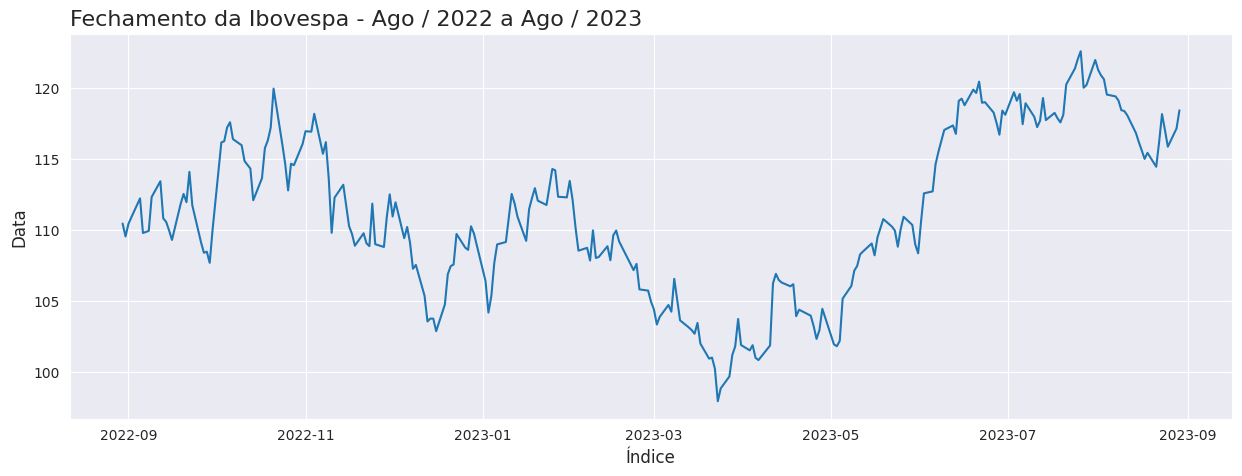

In [ ]:
plotar("Fechamento da Ibovespa - Ago / 2022 a Ago / 2023", "Índice", "Data", "Data", "Último", df_1a_1)

**Ao analisar o gráfico, verificamos baixas maiores por volta de dez/22 e jan/23, provavelmente causadas pela transição presidencial, e em mar-abr/23, que podem ter sido resultado de tensões no mercado internacional.**

## Decomposição da série
**Usamos a decomposição para avaliar melhor o comportamento dos dados, separando as visualizações de tendência, sazonalidade e ruído.**

In [ ]:
resultados = seasonal_decompose(df_1a_1["Último"], period=6)

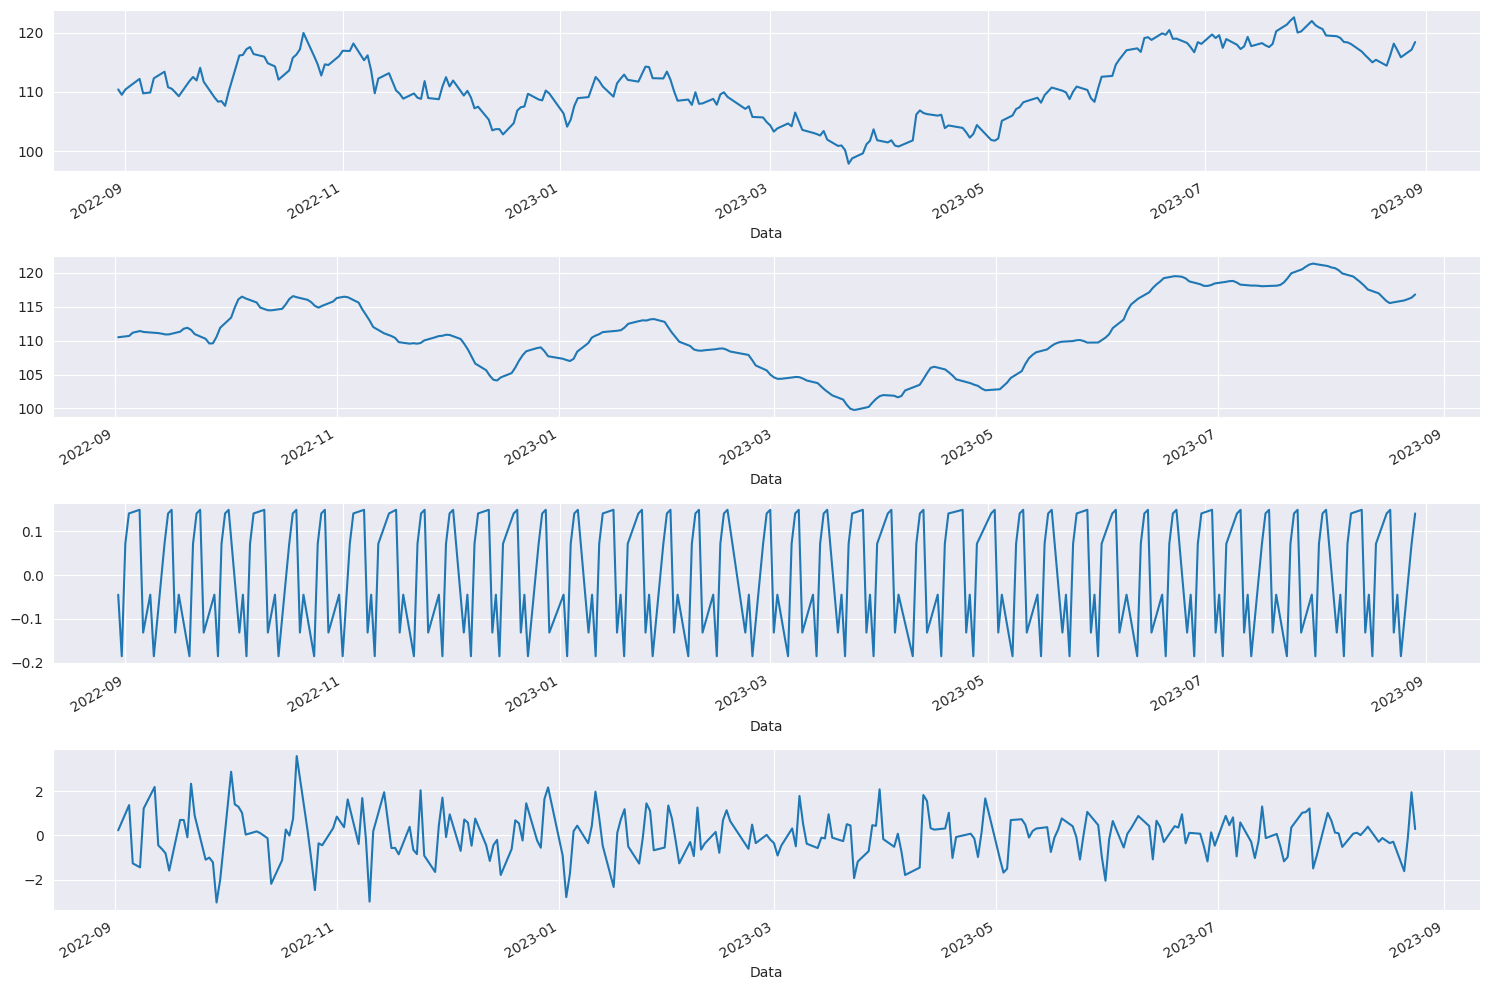

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

**A tendência é levemente crescente, com queda significativa em mar, abr e mai 2023. A série apresenta padrão de sazonalidade. Houve ruído maior no final de 2022 e início de 2023, provavelmente causado pela transição de governo.**

## Teste ADF

Usaremos o **Teste ADF (Augmented Dickey-Fuller)** para avaliar se a série é estacionária ou não.

*   H0: hipótese nula (série não estacionária)
*   H1: hipótese alternativa (série estacionária - rejeição da hipótese nula)

Para rejeitar H0 e considerar H1, o p-value precisa ser menor ou igual q algum nível de significância (q definimos de acordo com a necessidade - O mais comum é 5%).

Quanto menor o p-value, mais evidências contra a hipótese nula se tem. Ou seja, se p-value é 0.05 (5%), rejeitamos H0 com nível de confiança de 95%. Se p-value maior que isso, não rejeitamos H0.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
x = df_1a_1.Último.values

In [ ]:
result = adfuller(x)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-value: {result[1]}")
print("Valores críticos: ")

#fazer for pra mostrar valores críticos com 1%, 5% e 10% de intervalo de confiança:
for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.210759051303894
P-value: 0.20236374197413348
Valores críticos: 
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876


O P-VALUE é alto (0.20) e o valor do teste estatístico (-2.21) foi maior que os valores críticos. **Nesse caso, a série não é estacionária.**

## Transformação da série em estacionária

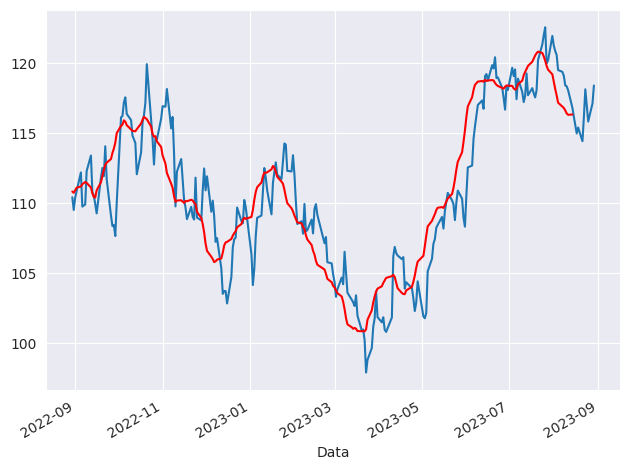

In [ ]:
ma = df_1a_1.rolling(12).mean()

f, ax = plt.subplots()
df_1a_1.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

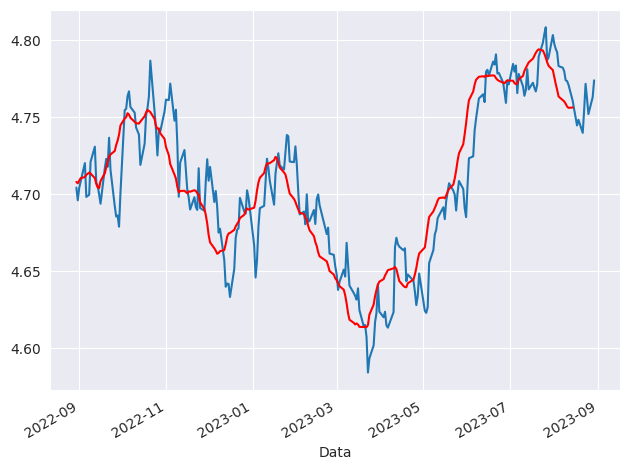

In [ ]:
df_log = np.log(df_1a_1)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

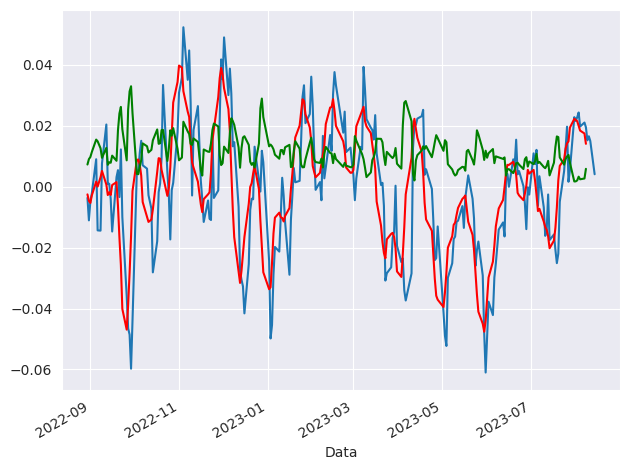

In [ ]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(5).mean()

std = df_s.rolling(5).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [ ]:
X_s = df_s.Último.values

result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-value: {result_s[1]}")
print("Valores críticos: ")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -5.070987936166092
P-value: 1.6029583486200425e-05
Valores críticos: 
	1%: -3.4582467982399105
	5%: -2.8738137461081323
	10%: -2.5733111490323846


**P-value mto próximo de zero (logo, abaixo dos 5%) e teste estatístico um pouco menor que os valores críticos (-5.07). Tentaremos "esticar" mais a média para a transformação em estacionária.**

Teste ADF
Teste Estatístico: -7.576968230717067
P-value: 2.745304685588979e-11
Valores críticos: 
	1%: -3.459105583381277
	5%: -2.8741898504150574
	10%: -2.5735117958412097


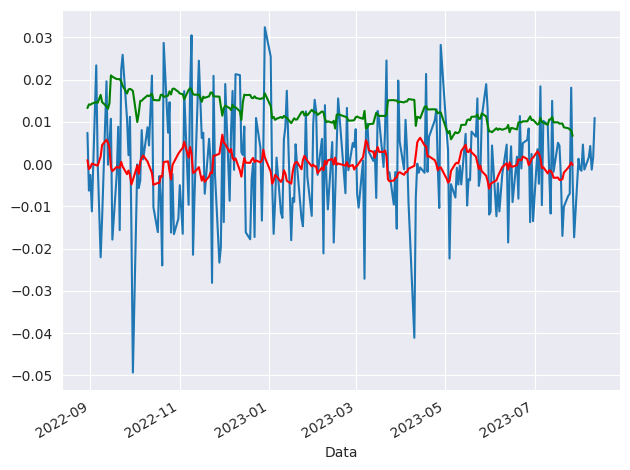

In [ ]:
#usando a diferenciação pra transformar a série em estacionária:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


X_diff = df_diff.Último.dropna().values

result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-value: {result_diff[1]}")
print("Valores críticos: ")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

**Ao usar a diferenciação para transformar a série em cada vez mais estacionária, o P value fica ainda menor (tendendo a zero) e como se a linha vermelha do gráfico (média) fica cada vez mais "esticada". Utilizaremos a série após essa última diferenciação para construir os modelos.**

## ACF e PACF

**Autocorrelação (ACF)**: mostra como os pontos dados em diferentes pontos no tempo estão linearmente relacionados entre si. O número de
intervalos entre duas medições é conhecido como lag. O gráfico mostra a correlação entre a série e seus valores passados em incrementos de tempo
cada vez maiores.

**Autocorrelação parcial (PACF)**: é a correlação parcial desta série temporal com ela mesma em determinado lag, dadas as informações entre os dois tempos.

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
#nlags: escolhemos previsão para 20 dias. Como a série só tem dias úteis, 20 dias corresponde a aproximadamente 1 mês.
lag_acf = acf(df_diff.dropna(), nlags=20)
lag_pacf = pacf(df_diff.dropna(), nlags=20)

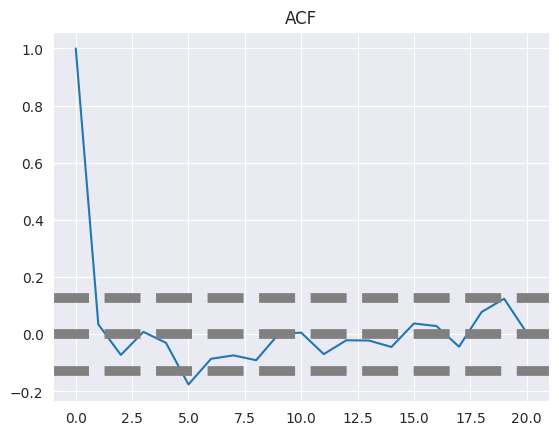

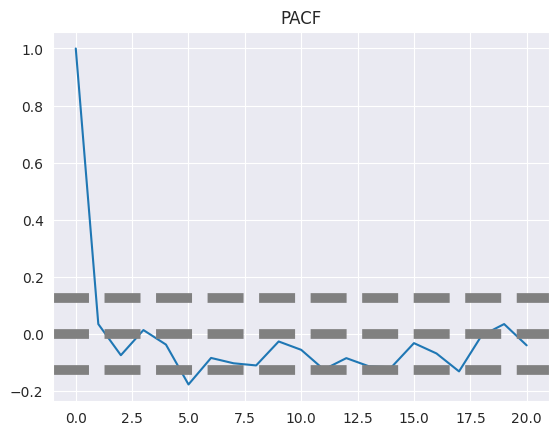

In [ ]:
plt.plot(lag_acf)

plt.axhline(y=-1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.axhline(y=0, linestyle="--", color="gray", linewidth=7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y=-1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.axhline(y=0/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff) - 1))), linestyle="--", color="gray", linewidth=7)
plt.title("PACF")
plt.show()


**Outra forma de representar a ACF e PACF:**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

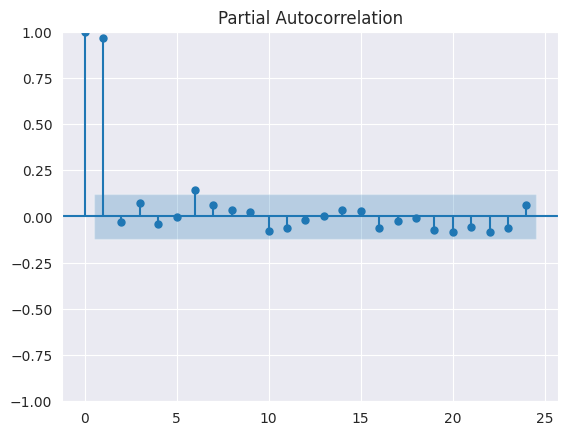

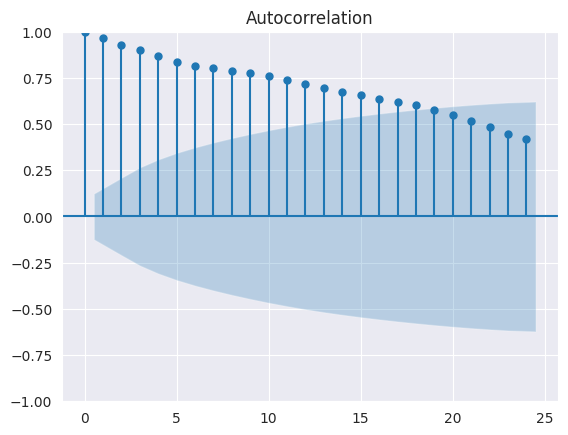

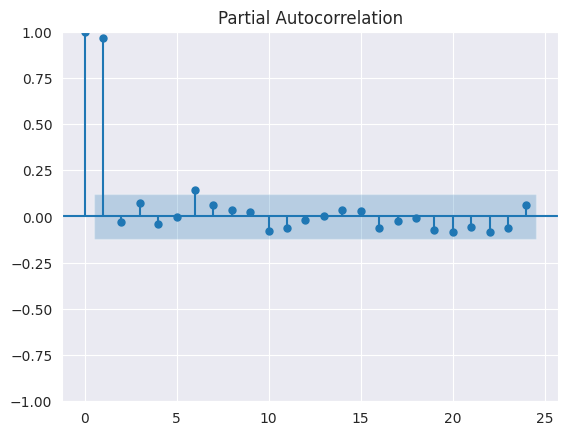

In [ ]:
plot_acf(df_1a_1.Último)
plot_pacf(df_1a_1.Último)

**Na ACF, temos uma correlação maior com lags mais recentes, que se perdem com o tempo.**

## Modelando e realizando o forecasting

###**Modelagem**

In [ ]:
df_1a = df_1a.rename(columns={'Data':'ds','Último':'y'})

In [ ]:
df_1a["unique_id"] = 'Ações'

In [ ]:
df_1a

,ds,y,unique_id
0,2023-08-29,118.404,Ações
1,2023-08-28,117.121,Ações
2,2023-08-25,115.837,Ações
3,2023-08-24,117.026,Ações
4,2023-08-23,118.135,Ações
...,...,...,...
245,2022-09-05,112.203,Ações
246,2022-09-02,110.864,Ações
247,2022-09-01,110.405,Ações
248,2022-08-31,109.523,Ações


In [ ]:
#separando a base: usamos mar-ago/2023 para validação e o restante para treino:

treino = df_1a.loc[(df_1a['ds'] < '2023-03-01')]
valid = df_1a.loc[df_1a["ds"] >= '2023-03-01']

In [ ]:
h = valid["ds"].nunique()

In [ ]:
h

126

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [ ]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 14.2 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.6-py3-none-any.whl size=158045 sha256=3f09d1f44f909a4670db3f6ff0694a1d4f8a7403a35af2abb803108550875bc8
  Stored in directory: /root/.cache/pip/wheels/c8/54/a1/b294b8b33c6107946b5720b3acb1fce07b97bbbc9677a501ce
Successfully built fugue-sql-antlr


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:25: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


**A seguir, usaremos modelos diversos para prever os dados de aproximadamente 5 meses de 2023 (126 dias úteis), com base de treino de 1 ano.**

### **Modelos usando a biblioteca StatsForecast**

#### **Modelo 1 (Naive)**

WMAPE: 4.99%


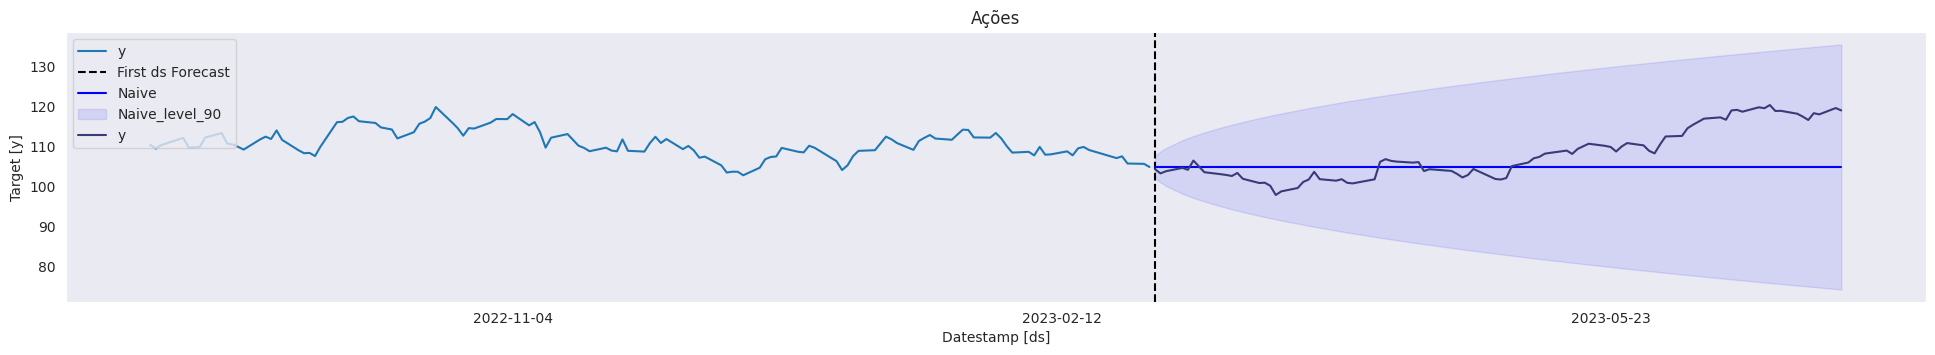

In [ ]:
#solução usando o último dia do período de treino pra prever o período de teste
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)  #criar a classe model. Usar models como "naive" (modelo escolhido), frequência de medição (diária), n_jobs=número de CPUs/núcleos do processador usadas (-1 significa usar todas as CPUs)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])  #predição: variável h (horizonte), level: nível de predição (nesse caso 90%)
forecast_df = forecast_df.merge(valid, on=['ds', 'unique_id'], how='left') #fazer merge da tabela de dados preditos com dados de validação. Equivalente ao left join (queremos ver o modelo com base na tabela da esquerda e o que é comum com a tabela da direita)
forecast_df = forecast_df.dropna()

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values) #pegar os valores da coluna y (verdadeiro) e os valores do Naive (predito)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=["Ações"],engine ='matplotlib', max_insample_length=200)

**O wmape mostra valor de erro baixo (4.99%), porém, o modelo Naive ignora a sazonalidade dos dados e prevê o mesmo valor para toda a categoria '2023'. No início do cone há alguns acertos, mas como a tendência do período está crescente, a previsão é que a porcentagem de erro aumente com o passar do tempo, se a série continuar apresentando esse comportamento.**

**Percebemos que o erro do modelo diminuirá quando a série estiver em queda e aumentará quando a série estiver em crescimento.**


#### **Modelo 2 (Seasonal Naive)**


WMAPE: 4.91%


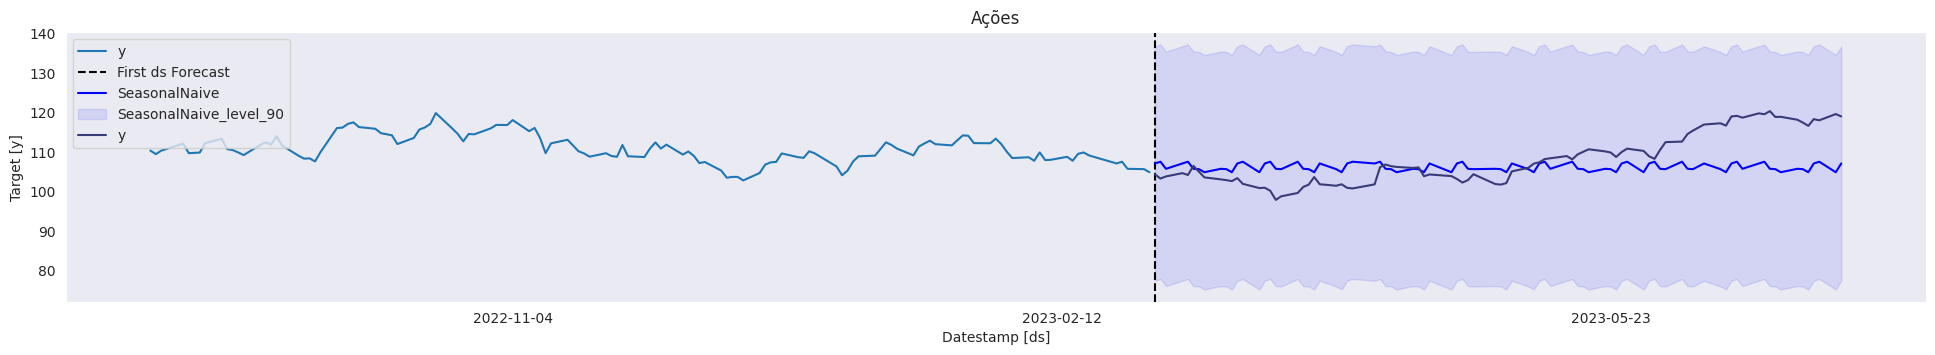

In [ ]:
#trabalhar com modelo de baseline (ainda baseado nos últimos valores de treino), porém considerando a sazonalidade
#pra isso, usamos o modelo SeasonalNaive, usando os dados de 1 semana pra prever
model_s = StatsForecast(models=[SeasonalNaive(season_length=5)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfs = forecast_dfs.dropna()

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=["Ações"],engine ='matplotlib', max_insample_length=200)

**O erro médio (wmape) dimimuiu um pouco em relação ao modelo Naive (4.91%). Mesmo sendo um pouco mais preciso e considerando a sazonalidade dos dados, o modelo não inclui as tendências crescentes da série, logo, a porcentagem de erro pode aumentar com o passar do tempo, se a série continuar apresentando essa tendência.**

#### **Modelo 3 (Seasonal Window Average)**


WMAPE: 5.33%


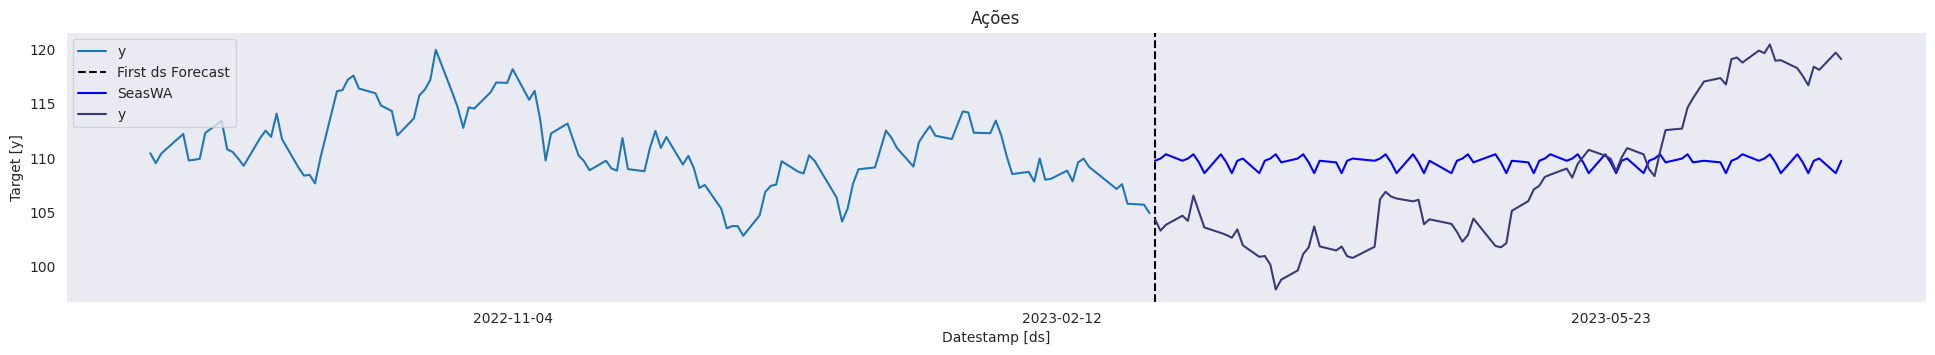

In [ ]:
#trabalhar com modelo de baseline (ainda baseado nos últimos valores de treino), considerando a sazonalidade e a média móvel (window_size)
#pra isso, usamos o modelo SeasonalWindowAverage, usando os dados de 1 semana pra prever e média das últimas 5 semanas
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=5, window_size=5)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h)
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfsm = forecast_dfsm.dropna()

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids=["Ações"],engine ='matplotlib', max_insample_length=200)

**O erro médio aumentou em relação aos outros modelos: 5.33%. O gráfico da previsão do modelo é o que menos representa o comportamento dos dados até o momento, apesar de ainda ter valor de erro considerado baixo.**

#### **Modelo 4 (AutoARIMA)**


WMAPE: 4.90%


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:1514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unique_id"] = df["unique_id"].astype(uid_dtype)


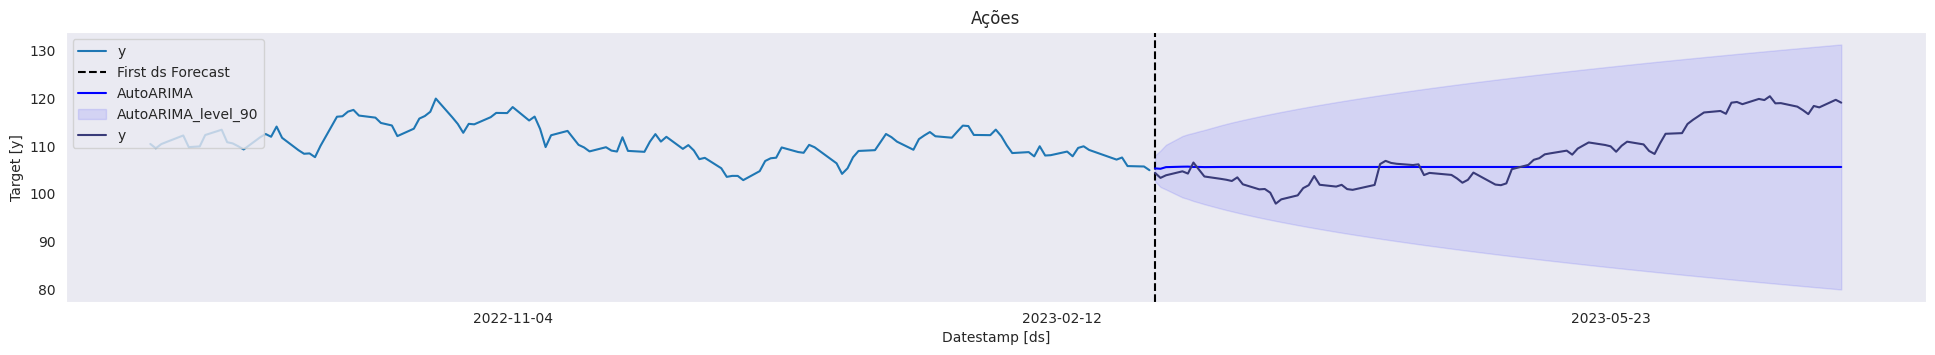

In [ ]:
#AR: Modelo autoregressivo (olha para os dados do passado e acha uma correlação futura)
#I: Integrado (quantidade que a série foi diferenciada) - ele tenta transformar a série estacionária em não estacionária (como fizemos na outra aula), e faz uma quantidade de diffs pra isso. Esse I é a qtde de diffs.
#MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=5)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfa = forecast_dfa.dropna()

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], engine ='matplotlib', max_insample_length=200)

**O erro médio do Arima foi o menor em relação aos modelos anteriores (4.90%), porém, percebemos que o gráfico é bem similar ao do modelo Naive. Ou seja, ele não considera a sazonalidade dos dados e prevê valor único para 2023.**

###**Modelagem com Prophet**

In [ ]:
from prophet import Prophet

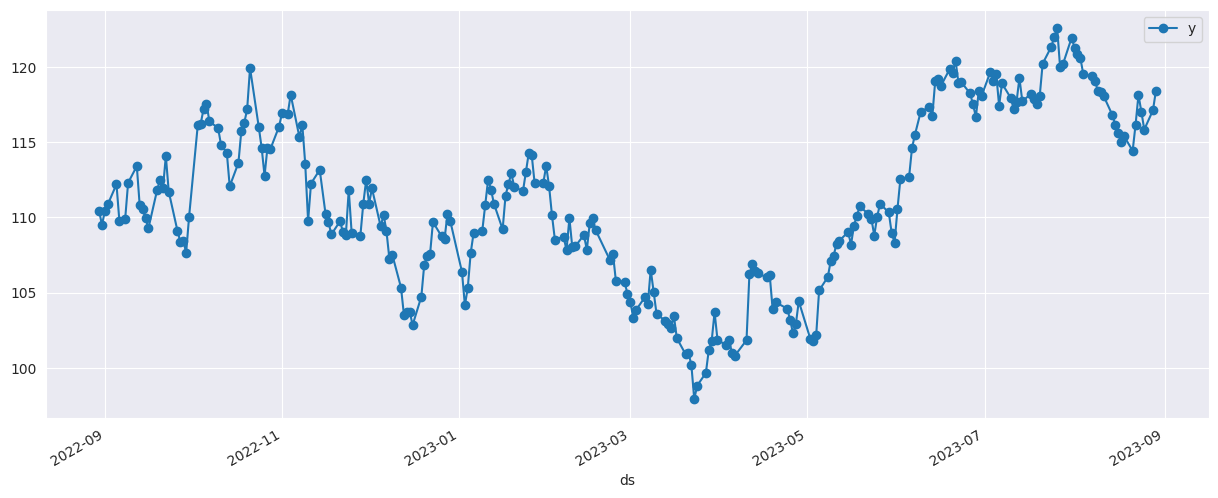

In [ ]:
df_1a.plot(x = 'ds', y = 'y', figsize = (15,6), marker='o');

In [ ]:
#fazer fit do modelo com o df de treino
model_p = Prophet()
model_p.fit(treino)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok5tzb6g/1b10_k8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok5tzb6g/7ayy8fox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22887', 'data', 'file=/tmp/tmpok5tzb6g/1b10_k8u.json', 'init=/tmp/tmpok5tzb6g/7ayy8fox.json', 'output', 'file=/tmp/tmpok5tzb6g/prophet_modelqo8vwjn7/prophet_model-20230830164131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#cria novo df com datas futuras usando 126 períodos para a previsão para poder comparar com o statsforecast:
future = model_p.make_future_dataframe(periods=126)
future.info()
future.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      250 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 KB


,ds
245,2023-06-30
246,2023-07-01
247,2023-07-02
248,2023-07-03
249,2023-07-04


In [ ]:
#faz a previsão com base nas datas futuras do df anterior
previsao = model_p.predict(future)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_p, previsao)

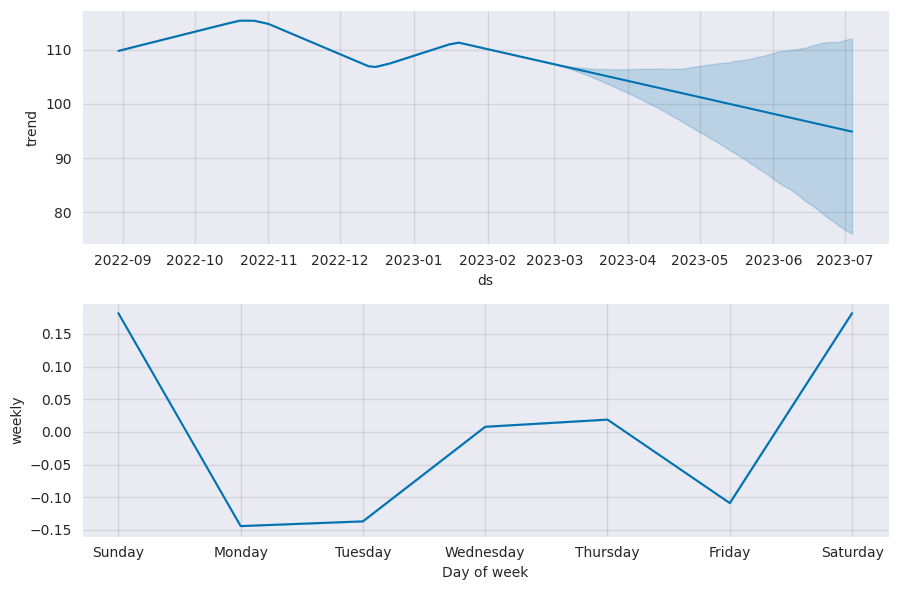

In [ ]:
grafico = model_p.plot_components(previsao)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
df_validation = cross_validation(model_p, horizon="30 D", parallel= "processes")


INFO:prophet:Making 5 forecasts with cutoffs between 2022-11-30 00:00:00 and 2023-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7b1b85e051e0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok5tzb6g/o9v3vlpr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok5tzb6g/kxktb0xk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok5tzb6g/o14e2u_e.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73030', 'data', 'file=/tmp/tmpok5tzb6g/o9v3vlpr.json', 'init=/tmp/tmpok5tzb6g/kxktb0xk.json', 'output', 'file=/tmp/tmpok5tzb6g/prophet_modeldmr76zu6/prophet_model-20230830164731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:47:31 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok5tzb6g/b_8rqr4v.json
DEBUG:cmdstanpy:idx 0
INFO:cmdstanpy:Chain [

  horizon        mse      rmse       mae      mape     mdape     smape  \
0  4 days   3.832587  1.957699  1.574540  0.014303  0.012834  0.014283   
1  5 days   6.638679  2.576563  2.036969  0.018649  0.017579  0.018507   
2  6 days   6.979604  2.641894  2.204092  0.020215  0.019349  0.020210   
3  7 days   7.456100  2.730586  2.424400  0.022287  0.019349  0.022448   
4  8 days  11.315035  3.363783  2.896933  0.026617  0.025404  0.026818   
5  9 days  14.550849  3.814558  3.026536  0.027851  0.023898  0.027785   
6 10 days  16.438189  4.054404  3.297214  0.030193  0.033493  0.030004   
7 11 days  21.027003  4.585521  3.982087  0.036325  0.039659  0.036179   
8 12 days  28.565036  5.344627  4.967288  0.045165  0.047015  0.045400   
9 13 days  30.150615  5.490958  4.898293  0.044571  0.039350  0.045172   

   coverage  
0  0.800000  
1  0.800000  
2  0.775000  
3  0.640000  
4  0.500000  
5  0.475000  
6  0.433333  
7  0.300000  
8  0.133333  
9  0.200000   



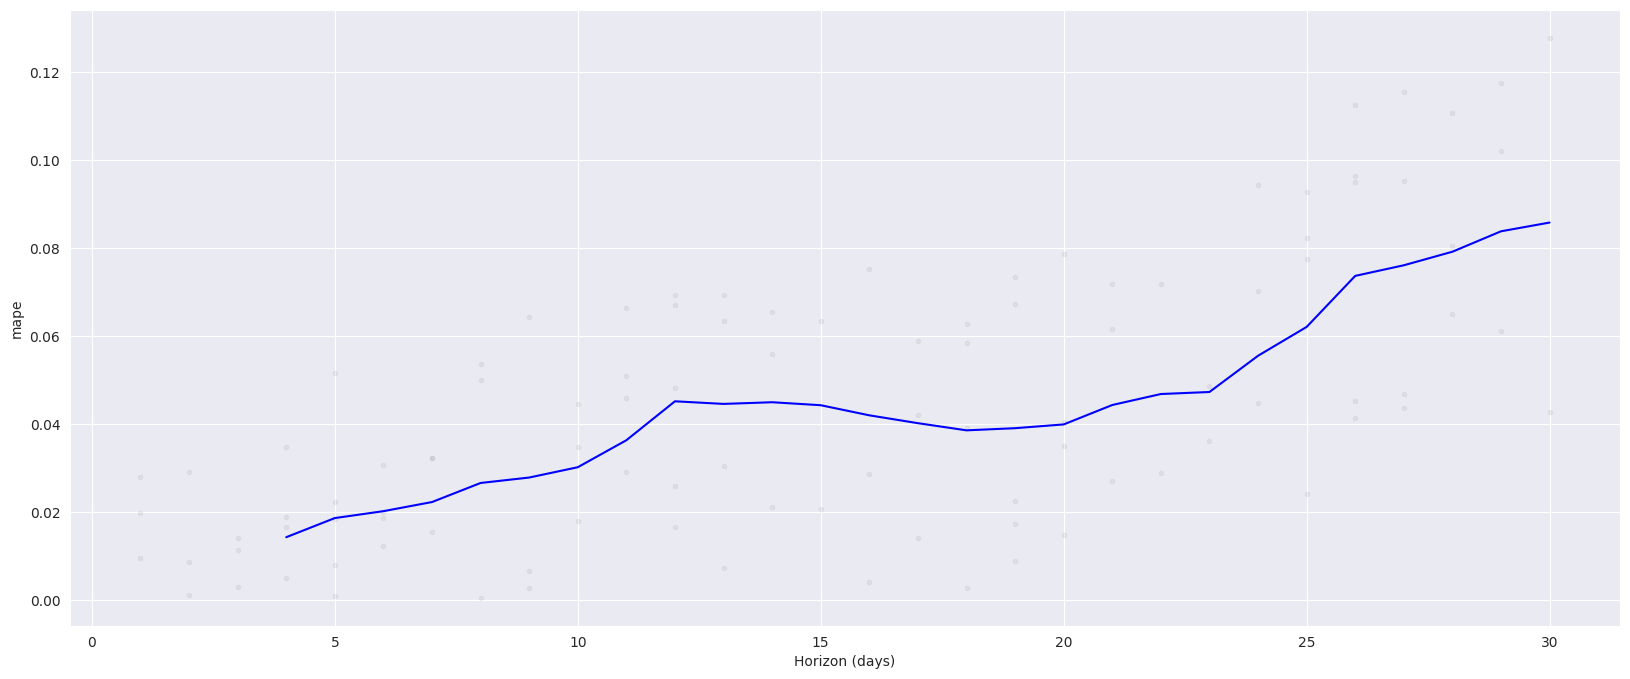

In [ ]:
df_pm = performance_metrics(df_validation)
print(df_pm.head(10), "\n")

plot_cross_validation_metric(df_validation, metric="mape", figsize=(20, 8))
plt.show()

**O modelo criado com a biblioteca Prophet tem erro de aproximadamente 1% na data mais próxima aos dados e esse valor tende a aumentar ao longo dos dias, podendo chegar a quase 9% em 30 dias de previsão.**

## Conclusões

* O comportamento do Ibovespa é um tanto quanto instável, apresentando leve tendência crescente no último ano. Acredito que isso deve-se à sua sensibilidade a diversos fatores nacionais e mundiais, como crises econômicas, mudanças de governo, guerras, entre outros. Percebemos que há quedas significativas entre set/2022 e jan/2023, provavelmente devido às eleições presidenciais e transição de governo, e há nova queda em mar/2023, que pode ter ocorrido devido a desdobramentos na guerra da Ucrânia ou mudanças no índice inflacionário.

* Foram gerados 4 modelos de previsão do índice com a biblioteca StatsForecast e um modelo usando a biblioteca Prophet.  

**StatsForest:** o modelo com menor taxa de erro foi o Auto Arima, em 4.90%, porém ele não acompanhou a sazonalidade dos dados, prevendo de forma muito uniforme todos os dias do período. Por isso, acreditamos que o melhor modelo para descrever os dados nessa biblioteca é o Seasonal Naive, pois conseguiu uma taxa de erro semelhante ao Auto Arima (4.91%) e trouxe uma previsão mais variada ao longo dos dias, tentando acompanhar a sazonalidade dos dados.

**Prophet:** O modelo do Prophet consegue mostrar as variações nos dados de forma mais detalhada, acompanhando a sazonalidade de forma bem próxima. Ao analisar as taxas de erro, percebemos que as taxas de datas mais próximas às de treino tem menor chance de erro (2%), podendo chegar a quase 9% em datas mais distantes (por volta de 30 dias).

Concluímos que, nesse cenário, é mais interessante fazer previsões com janelas de dados mais curtas e utilizar o Prophet para fazer essas previsões. Apesar da sugestão do Prophet, é importante lembrar que todos os modelos apresentaram taxas de erro bem similares.   